In [1]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [2]:
import torchvision
import torchvision.transforms as transforms
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
traindataset = torchvision.datasets.CIFAR10(root='CIFAR10',train=True,transform=transforms.ToTensor(),download=True)
testdataset = torchvision.datasets.CIFAR10(root='CIFAR10',train=False,transform=transforms.ToTensor(),download=True)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
from torch.utils.data import DataLoader
trainload = DataLoader(traindataset,batch_size=100,shuffle=True)
testload = DataLoader(testdataset,batch_size=100,shuffle=False)

Total training: 500
epoch shape: torch.Size([100, 3, 32, 32])
graph shape: torch.Size([3, 32, 32])
first label: tensor(9)


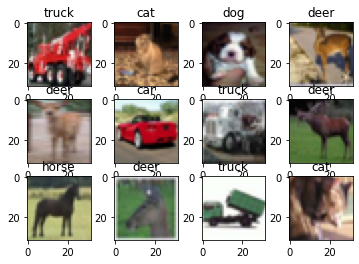

In [6]:
import torch,numpy as np
import matplotlib.pyplot as plt
print("Total training:",len(trainload))
imgdata,labeldata = [],[]
for imgs,labels in trainload:
    imgdata.append(imgs)
    labeldata.append(labels)

print("epoch shape:",imgdata[0].shape)
print("graph shape:",imgdata[0][0].shape)
print("first label:",labeldata[0][0])

classes={0:'plane',1:'car',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}
for i in range(12):
    img = np.array(imgdata[0][i]).transpose((1,2,0))
    plt.figure(1)
    plt.subplot(3,4,i+1)
    plt.imshow(img)
    plt.title("{}".format(classes[int(labeldata[0][i])]))
plt.show()

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
class Lenet5(nn.Module):
    def __init__(self):
        super(Lenet5, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(4096, 120)
        self.fc2 = nn.Linear(120, 10)
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(x.size()[0],-1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [ ]:
import torch.optim as optim
def modeltrain(epoch,model,traindata,optimizer,criterion):
    model.train()
    for index,(data, target) in enumerate(traindata):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if index % 100 == 0:
            print('Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch, index * len(data), len(trainload.dataset),100. * index / len(trainload), loss.item()))

In [ ]:
def verify(model,testdata,criterion):
    model.eval()
    accuracy = 0
    runloss = 0
    for data,target in testdata:
        predict = model(data)
        loss = criterion(predict,target)
        runloss+=loss.item()*data.size(0)
        pred = predict.data.max(1,keepdim=True)[1]
        accuracy += pred.eq(target.data.view_as(pred)).cuda().sum()
    epochloss = runloss / len(testdata)
    print('\nAverage loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(epochloss,accuracy,len(testload.dataset),100. * accuracy / len(testload.dataset)))

In [ ]:
net = Lenet5()
criterion = nn.CrossEntropyLoss(reduction='sum')
optimizer = optim.Adam(net.parameters(), lr=1e-3)
for epoch in range(1,20):
  modeltrain(epoch=epoch,model=net,traindata=trainload,optimizer=optimizer,criterion=criterion)
torch.save(net,'trained.pkl')
model = torch.load('trained.pkl')
verify(model=model,testdata=testload,criterion=criterion)

Epoch: 1 [0/50000 (0%)]	Loss: 230.384613
Epoch: 1 [10000/50000 (20%)]	Loss: 196.636978
Epoch: 1 [20000/50000 (40%)]	Loss: 132.538208
Epoch: 1 [30000/50000 (60%)]	Loss: 121.757217
Epoch: 1 [40000/50000 (80%)]	Loss: 128.585709
Epoch: 2 [0/50000 (0%)]	Loss: 115.805466
Epoch: 2 [10000/50000 (20%)]	Loss: 110.535522
Epoch: 2 [20000/50000 (40%)]	Loss: 131.206360
Epoch: 2 [30000/50000 (60%)]	Loss: 116.022934
Epoch: 2 [40000/50000 (80%)]	Loss: 113.357224
Epoch: 3 [0/50000 (0%)]	Loss: 106.074554
Epoch: 3 [10000/50000 (20%)]	Loss: 119.156242
Epoch: 3 [20000/50000 (40%)]	Loss: 113.619301
Epoch: 3 [30000/50000 (60%)]	Loss: 70.003563
Epoch: 3 [40000/50000 (80%)]	Loss: 99.025742
Epoch: 4 [0/50000 (0%)]	Loss: 79.313644
Epoch: 4 [10000/50000 (20%)]	Loss: 80.276413
Epoch: 4 [20000/50000 (40%)]	Loss: 79.793579
Epoch: 4 [30000/50000 (60%)]	Loss: 91.047646
Epoch: 4 [40000/50000 (80%)]	Loss: 86.740334
Epoch: 5 [0/50000 (0%)]	Loss: 76.300461
Epoch: 5 [10000/50000 (20%)]	Loss: 86.383881
Epoch: 5 [20000/50000 

In [ ]:
data_loader_test = torch.utils.data.DataLoader(dataset=testdataset,batch_size=30,shuffle=True)
x_test,y_test = next(iter(data_loader_test))
model = torch.load('trained.pkl')
y_estimate = model(x_test)
pred_y = torch.max(y_estimate,1)[1].data.numpy()
print("epoch estimate:",pred_y)
print("epoch number： ",y_test.numpy())

epoch estimate: [5 2 8 4 0 0 6 8 4 7 8 1 1 9 5 6 5 6 2 6 3 5 7 8 1 5 7 0 4 6]
epoch number：  [5 3 1 7 3 0 2 8 4 7 8 9 1 9 5 6 5 6 3 6 8 5 5 8 1 5 7 0 4 6]
